In [233]:
import pandas as pd
from pylab import *
%matplotlib inline

In [234]:
df = pd.read_csv('/Users/nikhelg/Documents/Learnings/CoronaVirus/policy_pandemic/local_work/ProbabilityExercise/tests-vs-confirmed-cases-covid-19-per-million.csv')

In [235]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(85)

,Entity,Code,Date,Total COVID-19 tests per million people,Total confirmed cases of COVID-19 per million people (cases per million)
0,Afghanistan,AFG,2019-12-31,NaN,0.000000
1,Afghanistan,AFG,2020-01-01,NaN,0.000000
2,Afghanistan,AFG,2020-01-02,NaN,0.000000
3,Afghanistan,AFG,2020-01-03,NaN,0.000000
4,Afghanistan,AFG,2020-01-04,NaN,0.000000
...,...,...,...,...,...
80,Afghanistan,AFG,2020-03-30,NaN,2.928458
81,Afghanistan,AFG,2020-03-31,NaN,3.622040
82,Afghanistan,AFG,2020-04-01,NaN,4.264245
83,Albania,ALB,2020-03-09,NaN,0.694975


In [236]:
df1 = df[df.Date.isin(['2020-03-20'])]
df1.head()

,Entity,Code,Date,Total COVID-19 tests per million people,Total confirmed cases of COVID-19 per million people (cases per million)
70,Afghanistan,AFG,2020-03-20,NaN,0.565141
94,Albania,ALB,2020-03-20,NaN,24.324136
182,Algeria,DZA,2020-03-20,NaN,1.869967
201,Andorra,AND,2020-03-20,NaN,970.685304
257,Argentina,ARG,2020-03-20,NaN,2.832123


In [237]:
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)

In [238]:
df1.head(40)

,Entity,Code,Date,Total COVID-19 tests per million people,Total confirmed cases of COVID-19 per million people (cases per million)
0,Australia,AUS,2020-03-20,4473.4,27.804051
1,Austria,AUT,2020-03-20,1777.8,243.826612
2,Bahrain,BHR,2020-03-20,10982.1,158.088086
3,Colombia,COL,2020-03-20,81.7,2.515581
4,Czech Republic,CZE,2020-03-20,1092.7,64.805413
5,Denmark,DNK,2020-03-20,1851.0,198.715411
6,Estonia,EST,2020-03-20,1925.3,201.275650
7,Faeroe Islands,FRO,2020-03-20,33292.8,1473.447253
8,Hungary,HUN,2020-03-20,312.5,8.798853
9,Iceland,ISL,2020-03-20,26772.3,967.032967


In [ ]:
from Ipython.display import Image
Image(filename=)

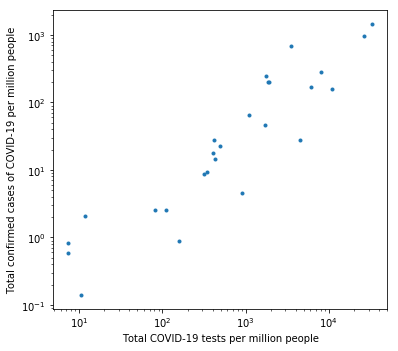

In [239]:
fig, ax = subplots(figsize=[6,5.5])
ax.loglog(df1['Total COVID-19 tests per million people'], df1['Total confirmed cases of COVID-19 per million people (cases per million)'], '.', linewidth=24)
ylabel('Total confirmed cases of COVID-19 per million people')
xlabel('Total COVID-19 tests per million people')
show()

In [240]:
import emcee
import scipy.optimize as optimize
import math

In [241]:
cores = 1
outdir  = "./"

pfa_stack = np.sort(np.array(df1['Total confirmed cases of COVID-19 per million people (cases per million)']))
fbina1 = np.sort(np.array(df1['Total COVID-19 tests per million people']))

prior_a_lo     =   0.
prior_a_hi     =   0.5
prior_b_lo     =   1e-4
prior_b_hi     =   2.

def lmodel(fbina1, a, b):
    return a * (fbina1)**b


def lnlike(params, x, y):
    a, b = params
    model   = lmodel(fbina1 = x, a = a, b = b)
    log_of_y_factorial = y*np.log(y)-y
    log_of_y_factorial[np.where(y==0.)] = 0.
    ln_prob = np.sum((y)*np.log(model) - model -  log_of_y_factorial)
    #ln_prob = np.sum( -0.5 * ( y - model )**2. / yerr**2. ) 
    return ln_prob

def lnlike_and_prior(params, x, y):
    a, b = params
    if  prior_a_lo     < a    < prior_a_hi     and \
        prior_b_lo     < b    < prior_b_hi:
        return lnlike(params, x, y)
    else:
        return -np.inf

# Set up the sampler.
ndim, nwalkers, nsteps = 2, 100, 800
#pos = [result["x"] + 1e-2*np.random.randn(ndim) for i in range(nwalkers)]
pos = np.array([
            [ np.random.uniform(prior_a_lo,prior_a_hi   ),
              np.random.uniform(prior_b_lo,prior_b_hi   )]
            for i in range(0,nwalkers) ])

# set the walkers       
sampler = emcee.EnsembleSampler(nwalkers = nwalkers,
                                    ndim      = ndim,
                                    log_prob_fn = lnlike_and_prior,
                                    args=(fbina1, pfa_stack),
                                    threads = cores)

sampler.run_mcmc(pos, nsteps=nsteps)
burnin = 10000
sampler_cleaned90 = np.array(sampler.get_chain(flat=True)[burnin:])

# Compute the quantiles.
sampler_cleaned90[:, 1] = (sampler_cleaned90[:, 1])
A_mcmc, B_mcmc= map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                 zip(*np.percentile(sampler_cleaned90, [16, 50, 84],
                                                    axis=0)))

print ("MCMC results :")
print("""MCMC result:
        a = {0[0]} +{0[1]} -{0[2]} (truth: {1})
        b = {2[0]} +{2[1]} -{2[2]} (truth: {3})
""".format(A_mcmc, 1, B_mcmc, 1))

MCMC results :
MCMC result:
        a = 0.06018103619370778 +0.00849597672108067 -0.007181214507738107 (truth: 1)
        b = 0.9669622808667705 +0.013266319053799047 -0.013903134350452206 (truth: 1)



In [242]:
a = sampler_cleaned90[:,0]
b = sampler_cleaned90[:,1]
percentiles =  []
xrangee = np.linspace(np.log10(np.sort(fbina1)[0]),np.log10(10**6),100)
xrangee = 10**xrangee
for i in range (0, len(xrangee)):
        lf = lmodel(xrangee[i], a, b)
        percentiles.append(np.percentile(lf, [16,50,84]))

percentiles = np.array(percentiles, dtype="float")

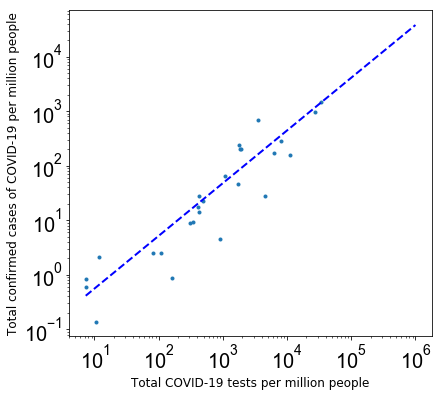

In [243]:
fig, ax = subplots(figsize=[6.5,6.])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(20)
ax.loglog(df1['Total COVID-19 tests per million people'], df1['Total confirmed cases of COVID-19 per million people (cases per million)'], '.', linewidth=24)
ylabel('Total confirmed cases of COVID-19 per million people', fontsize=12)
xlabel('Total COVID-19 tests per million people', fontsize=12)
ax.loglog(xrangee, lmodel(xrangee, np.median(sampler_cleaned90[:,0]), np.median(sampler_cleaned90[:,1])), linewidth=2, linestyle="--", c='blue')
#fill_between(xrangee, percentiles[:,0], percentiles[:,2], where=percentiles[:,2]>=percentiles[:,0], facecolor='blue', interpolate=True, alpha=0.3)
show()

In [244]:
print ('Expected number of confirmed cases if 1 million test are done:', lmodel(1e6, np.median(sampler_cleaned90[:,0]), np.median(sampler_cleaned90[:,1])) )

Expected number of confirmed cases if 1 million test are done: 38127.0624989674


In [260]:
P_notTest_infect = ((10**6)-df1['Total COVID-19 tests per million people'])/lmodel(1e6-df1['Total COVID-19 tests per million people'], np.median(sampler_cleaned90[:,0]), np.median(sampler_cleaned90[:,1]))
#P_notTest_infect_er = lmodel(1e6-df1['Total COVID-19 tests per million people'], np.percentile(sampler_cleaned90[:,0],[84]), np.percentile(sampler_cleaned90[:,0],[84]))
P_infect = df1['Total confirmed cases of COVID-19 per million people (cases per million)']
P_notTest = ((10**6)-df1['Total COVID-19 tests per million people'])
df1['Possible Infections'] = P_notTest_infect * P_infect / P_notTest
df1.head(30)

,Entity,Code,Date,Total COVID-19 tests per million people,Total confirmed cases of COVID-19 per million people (cases per million),Possible Infections
0,Australia,AUS,2020-03-20,4473.4,27.804051,0.000732
1,Austria,AUT,2020-03-20,1777.8,243.826612,0.006406
2,Bahrain,BHR,2020-03-20,10982.1,158.088086,0.004191
3,Colombia,COL,2020-03-20,81.7,2.515581,0.000066
4,Czech Republic,CZE,2020-03-20,1092.7,64.805413,0.001702
5,Denmark,DNK,2020-03-20,1851.0,198.715411,0.005221
6,Estonia,EST,2020-03-20,1925.3,201.275650,0.005289
7,Faeroe Islands,FRO,2020-03-20,33292.8,1473.447253,0.039932
8,Hungary,HUN,2020-03-20,312.5,8.798853,0.000231
9,Iceland,ISL,2020-03-20,26772.3,967.032967,0.026038


In [261]:
population = np.array([25499884, 9006398, 1701575, 50882891, 10708981, 5792202, 1326535, 48863, 9660351, 341243, 1380004385, 273523615, 60461826, 1886198, 2722289, 32365999, 5421241, 109581078, 37846611, 19237691, 5459642, 59308690, 51269185, 23816775, 43733762, 97338579])
df2 = df1
df2 = df2.rename(columns={"Total COVID-19 tests per million people": "Total COVID-19 tests"})
df2 = df2.rename(columns={"Total confirmed cases of COVID-19 per million people (cases per million)": "Total confirmed cases"})
df2['Total COVID-19 tests'] = df2['Total COVID-19 tests']/1e6*population
df2['Total confirmed cases'] = df2['Total confirmed cases']/1e6*population
df2['Possible Infections'] = df2['Possible Infections']*population
df2['population'] = population
df2.head(30)

,Entity,Code,Date,Total COVID-19 tests,Total confirmed cases,Possible Infections,population
0,Australia,AUS,2020-03-20,114071.181086,709.000083,1.867651e+04,25499884
1,Austria,AUT,2020-03-20,16011.574364,2195.999512,5.769606e+04,9006398
2,Bahrain,BHR,2020-03-20,18686.866807,268.998735,7.131063e+03,1701575
3,Colombia,COL,2020-03-20,4157.132195,128.000018,3.357461e+03,50882891
4,Czech Republic,CZE,2020-03-20,11701.703539,693.999935,1.822155e+04,10708981
5,Denmark,DNK,2020-03-20,10721.365902,1150.999801,3.024266e+04,5792202
6,Estonia,EST,2020-03-20,2553.977835,266.999195,7.015941e+03,1326535
7,Faeroe Islands,FRO,2020-03-20,1626.786086,71.997053,1.951195e+03,48863
8,Hungary,HUN,2020-03-20,3018.859687,85.000009,2.230062e+03,9660351
9,Iceland,ISL,2020-03-20,9135.859969,329.993231,8.885213e+03,341243


In [266]:
df3 = pd.read_csv('/Users/nikhelg/Documents/Learnings/CoronaVirus/policy_pandemic/local_work/ProbabilityExercise/full-list-cumulative-total-tests-per-million.csv')

In [267]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3 = df3[df3.Date.isin(['2020-04-01'])]
confirmed = np.array([1998, 110574, 9887, 29474, 215003])
popul = np.array([1380004385, 60461826, 51269185, 67886011, 331002651])
df3['Confirmed per million'] = confirmed/popul*1e6
df3['population'] = popul
df3.head(20)

,Entity,Code,Date,Cumulative total tests per million,Confirmed per million,population
46,India - samples tested,NaN,2020-04-01,34.666771,1.447821,1380004385
84,Italy - units unclear,NaN,2020-04-01,9156.164709,1828.823364,60461826
152,South Korea - cases tested,NaN,2020-04-01,8184.270189,192.844883,51269185
220,United Kingdom - people tested,NaN,2020-04-01,2271.935834,434.168978,67886011
248,United States - inconsistent units (COVID Trac...,NaN,2020-04-01,3469.675882,649.550689,331002651


In [268]:
P_notTest_infect = (1e6-df3['Cumulative total tests per million'])-lmodel(1e6-df3['Cumulative total tests per million'], np.median(sampler_cleaned90[:,0]), np.median(sampler_cleaned90[:,1]))
#P_notTest_infect_er = lmodel(1e6-df1['Total COVID-19 tests per million people'], np.percentile(sampler_cleaned90[:,0],[84]), np.percentile(sampler_cleaned90[:,0],[84]))
P_infect = df3['Confirmed per million']
P_notTest = ((10**6)-df3['Cumulative total tests per million'])
df3['Total Covid-19 tests'] = df3['Cumulative total tests per million']/1e6*popul
df3['Total confirmed cases'] = df3['Confirmed per million']/1e6*popul
#df3['Possible Infections'] = P_notTest_infect * P_infect / P_notTest *popul
df3.head(20)

,Entity,Code,Date,Cumulative total tests per million,Confirmed per million,population,Total Covid-19 tests,Total confirmed cases
46,India - samples tested,NaN,2020-04-01,34.666771,1.447821,1380004385,4.784030e+04,1998.0
84,Italy - units unclear,NaN,2020-04-01,9156.164709,1828.823364,60461826,5.535984e+05,110574.0
152,South Korea - cases tested,NaN,2020-04-01,8184.270189,192.844883,51269185,4.196009e+05,9887.0
220,United Kingdom - people tested,NaN,2020-04-01,2271.935834,434.168978,67886011,1.542327e+05,29474.0
248,United States - inconsistent units (COVID Trac...,NaN,2020-04-01,3469.675882,649.550689,331002651,1.148472e+06,215003.0
